# 고정비율 투자법 그림 3-10

1. 마음에 드는 우량주 선택(예: 삼성전자)
2. 선정한 종목 매수(단, 투자 자금의 10%만 매수, 나머지 90%는 단기 국고채 ETF에 투자)
3. 매달 마지막 거래일에 주식:국고채 비중 = 1:9 로 리밸런싱

그림 3-15 코스피지수 변동성 조절 포트폴리오

In [20]:
from settings import *

In [21]:
sec = fdr.DataReader("005930", start="1997-11-30", end="2022-2-21")

In [22]:
sec

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-13,942,953,920,940,538210,NaN
1998-01-14,996,1014,958,1015,865890,0.080
1998-01-15,1069,1094,1052,1095,465590,0.079
1998-01-16,1181,1181,1107,1182,1567730,0.079
1998-01-17,1181,1216,1143,1198,534260,0.014
...,...,...,...,...,...,...
2022-02-15,74100,74200,73100,73700,9320365,0.000
2022-02-16,74600,74900,74200,74800,10767386,0.015
2022-02-17,75000,75600,74500,75000,13605382,0.003


In [24]:
from pykrx import stock
sec = stock.get_market_ohlcv("19971130", "20220222", "005930")
sec

,시가,고가,저가,종가,거래량
날짜,,,,,
1997-12-01,750,775,738,742,137040
1997-12-02,723,739,682,709,328590
1997-12-03,688,750,654,749,641296
1997-12-04,784,807,784,808,431040
1997-12-05,872,872,872,872,133760
...,...,...,...,...,...
2022-02-16,74600,74900,74200,74800,10767386
2022-02-17,75000,75600,74500,75000,13605382
2022-02-18,74600,74800,73700,74300,10122226


In [25]:
sec = sec[['종가']]

In [26]:
sec['1997-12']

,종가
날짜,
1997-12-01,742
1997-12-02,709
1997-12-03,749
1997-12-04,808
1997-12-05,872
1997-12-06,822
1997-12-08,758
1997-12-09,699
1997-12-10,754


In [27]:
sec['2021-12'].tail()

,종가
날짜,
2021-12-24,80500
2021-12-27,80200
2021-12-28,80300
2021-12-29,78800
2021-12-30,78300


In [28]:
s = '1997-12-27'
e = '2022-2-22'

In [29]:
data = pd.DataFrame()
data['SEC'] = sec.copy()
data = data[s:e]
dd = pd.DataFrame()
dd.index = pd.date_range(s, e, freq='D')
denominator = len(pd.date_range(s, e, freq='D'))/len(pd.date_range(s, e, freq='Y'))
dd['현금'] = pow(1.03, 1/denominator)
dd['현금'] = dd['현금'].shift(1, fill_value=1.0)
dd['현금'] = dd['현금'].cumprod()
#%%
data = pd.merge(data, dd, left_index=True, right_index=True, how='left')

In [31]:
data

,SEC,현금
날짜,,
1997-12-27,686,1.000
1998-01-03,735,1.001
1998-01-05,777,1.001
1998-01-06,784,1.001
1998-01-07,799,1.001
...,...,...
2022-02-16,74800,2.093
2022-02-17,75000,2.093
2022-02-18,74300,2.093


In [32]:
def strategy(name, data, stock_w, cash_w):
    s = bt.Strategy(name, 
            [
                bt.algos.RunMonthly(run_on_end_of_period=True),
                bt.algos.SelectAll(),
                bt.algos.WeighSpecified(SEC=stock_w, 현금=cash_w),
#                 PrintTempWeights(),
                bt.algos.Rebalance(),
                # bt.algos.PrintInfo('{now} {name} {_price} {temp} \n{_universe}')
            ])

    return bt.Backtest(s, data, initial_capital=100000000.0)

In [33]:
t1 = strategy("t1",   data, 0.1, 0.9) 

In [34]:
r1 = bt.run(t1)

In [35]:
r1.display()

Stat                 t1
-------------------  ----------
Start                1997-12-26
End                  2022-02-22
Risk-free rate       0.00%

Total Return         274.69%
Daily Sharpe         1.37
Daily Sortino        2.48
CAGR                 5.62%
Max Drawdown         -8.12%
Calmar Ratio         0.69

MTD                  0.20%
3m                   0.53%
6m                   1.57%
YTD                  -0.22%
1Y                   1.73%
3Y (ann.)            4.58%
5Y (ann.)            4.35%
10Y (ann.)           4.20%
Since Incep. (ann.)  5.62%

Daily Sharpe         1.37
Daily Sortino        2.48
Daily Mean (ann.)    5.63%
Daily Vol (ann.)     4.11%
Daily Skew           0.54
Daily Kurt           5.70
Best Day             1.63%
Worst Day            -1.70%

Monthly Sharpe       1.19
Monthly Sortino      3.61
Monthly Mean (ann.)  5.58%
Monthly Vol (ann.)   4.68%
Monthly Skew         3.86
Monthly Kurt         34.18
Best Month           13.82%
Worst Month          -2.98%

Yearly Sharpe 

In [36]:
r1.prices.resample('M').last().to_drawdown_series().min()*100

t1   -7.178
dtype: float64

In [37]:
bt_sec = long_only_ew(data, ['SEC'], "SEC")

In [38]:
r_all = bt.run(bt_sec, t1)

1997-12-27 00:00:00


In [39]:
r_all.display()

Stat                 SEC         t1
-------------------  ----------  ----------
Start                1997-12-26  1997-12-26
End                  2022-02-22  2022-02-22
Risk-free rate       0.00%       0.00%

Total Return         10599.67%   274.69%
Daily Sharpe         0.69        1.37
Daily Sortino        1.22        2.48
CAGR                 21.34%      5.62%
Max Drawdown         -65.55%     -8.12%
Calmar Ratio         0.33        0.69

MTD                  0.14%       0.20%
3m                   -2.00%      0.53%
6m                   0.96%       1.57%
YTD                  -6.26%      -0.22%
1Y                   -10.71%     1.73%
3Y (ann.)            15.89%      4.58%
5Y (ann.)            13.31%      4.35%
10Y (ann.)           11.85%      4.20%
Since Incep. (ann.)  21.34%      5.62%

Daily Sharpe         0.69        1.37
Daily Sortino        1.22        2.48
Daily Mean (ann.)    27.52%      5.63%
Daily Vol (ann.)     39.90%      4.11%
Daily Skew           0.45        0.54
Daily Kurt  

In [40]:
r_all.prices.resample('M').last().to_drawdown_series().min()*100

SEC   -62.060
t1     -7.178
dtype: float64

    CAGR
t1 5.621
      MDD
t1 -8.118


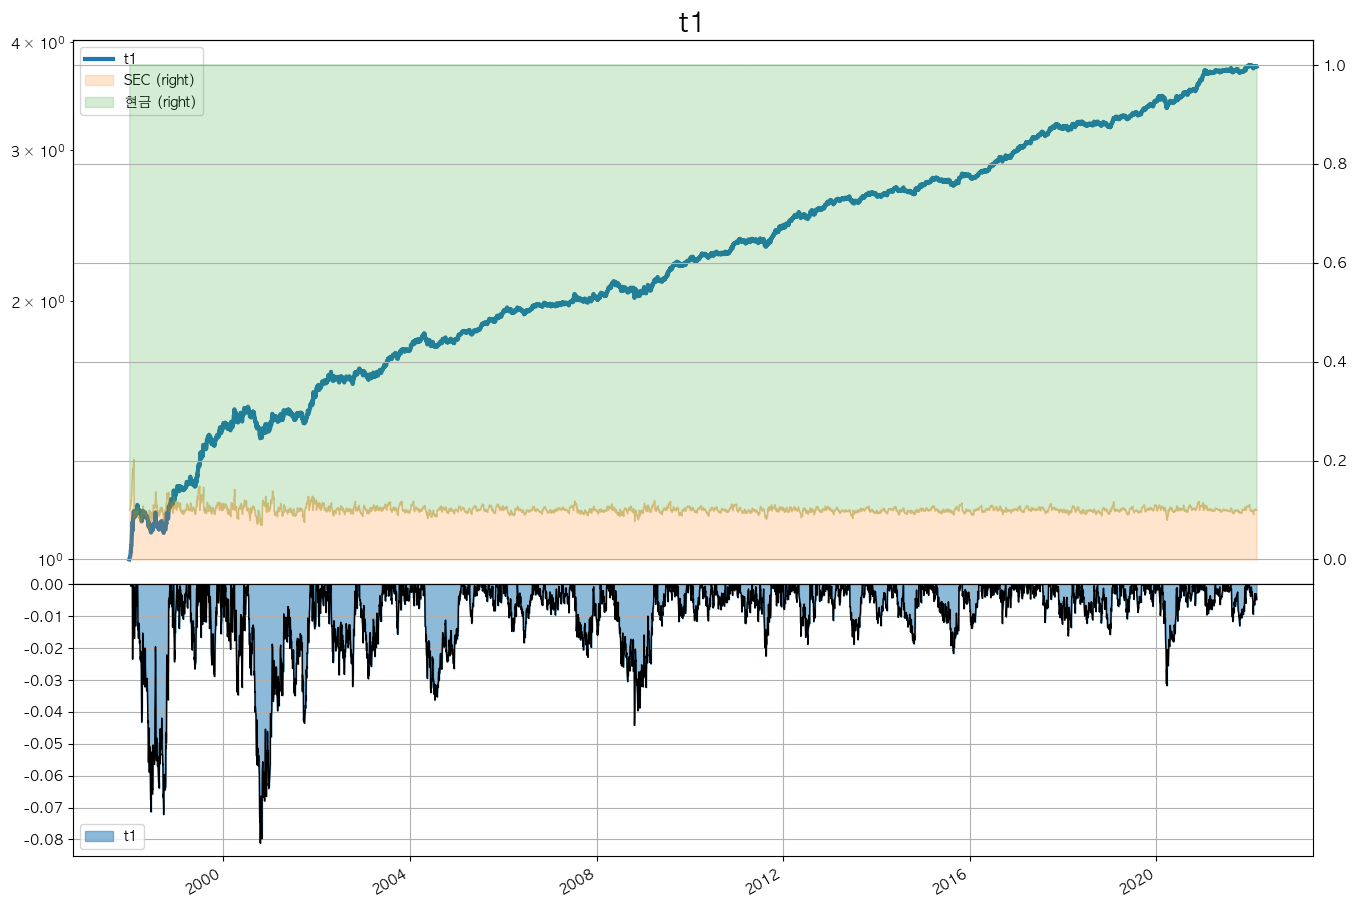

In [42]:
plot_assets(r1, s, e, "t1")

In [43]:
r1.set_date_range('2004')
r1.display()

Stat                 t1
-------------------  ----------
Start                2004-01-02
End                  2022-02-22
Risk-free rate       0.00%

Total Return         113.76%
Daily Sharpe         1.48
Daily Sortino        2.67
CAGR                 4.28%
Max Drawdown         -4.43%
Calmar Ratio         0.97

MTD                  0.20%
3m                   0.53%
6m                   1.57%
YTD                  -0.22%
1Y                   1.73%
3Y (ann.)            4.58%
5Y (ann.)            4.35%
10Y (ann.)           4.20%
Since Incep. (ann.)  4.28%

Daily Sharpe         1.48
Daily Sortino        2.67
Daily Mean (ann.)    4.31%
Daily Vol (ann.)     2.90%
Daily Skew           0.15
Daily Kurt           2.16
Best Day             1.17%
Worst Day            -1.21%

Monthly Sharpe       1.66
Monthly Sortino      4.60
Monthly Mean (ann.)  4.14%
Monthly Vol (ann.)   2.49%
Monthly Skew         0.36
Monthly Kurt         -0.04
Best Month           2.46%
Worst Month          -1.33%

Yearly Sharpe  

    CAGR
t1 4.276
      MDD
t1 -4.425


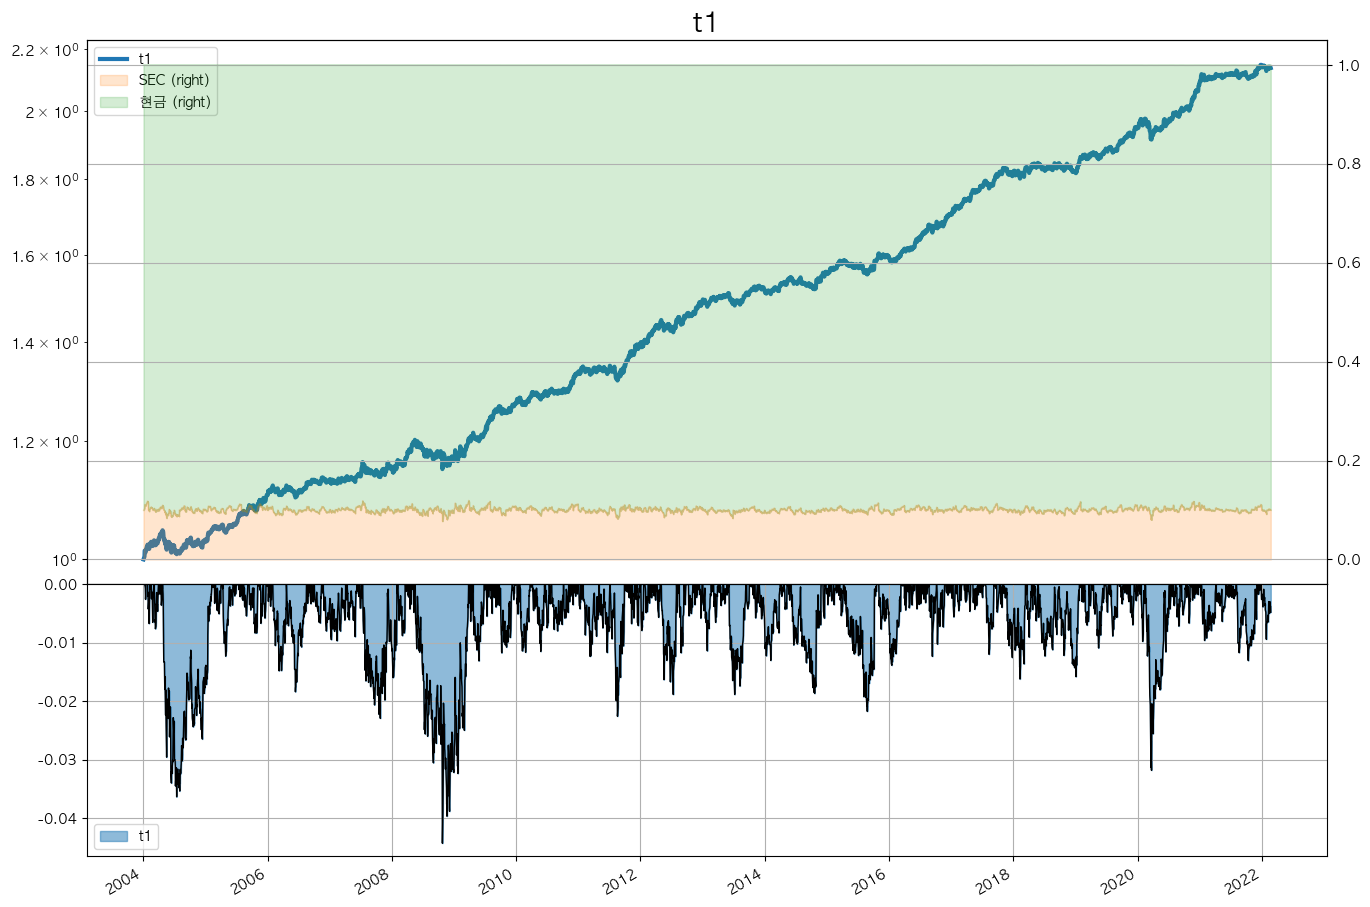

In [45]:
plot_assets(r1, "2004", e, "t1")

In [49]:
r1.backtests['t1'].stats.drawdown_details.sort_values(by="Length", ascending=False).head(20)

,Start,End,Length,drawdown
35,2000-07-14 00:00:00,2001-11-14 00:00:00,488,-0.081
125,2008-05-16 00:00:00,2009-03-27 00:00:00,315,-0.044
79,2004-04-26 00:00:00,2005-02-07 00:00:00,287,-0.036
5,1998-03-02 00:00:00,1998-11-14 00:00:00,257,-0.072
288,2018-05-28 00:00:00,2019-01-25 00:00:00,242,-0.016
49,2002-04-25 00:00:00,2002-11-21 00:00:00,210,-0.032
116,2007-07-16 00:00:00,2008-02-04 00:00:00,203,-0.023
236,2015-04-13 00:00:00,2015-10-21 00:00:00,191,-0.022
50,2002-12-04 00:00:00,2003-06-02 00:00:00,180,-0.030
222,2014-06-05 00:00:00,2014-11-28 00:00:00,176,-0.019


2022-02-22 00:00:00
2021-02-22 00:00:00
-8.117917959186427 5.930909651429972


,cagr,mdd
1997-12-26,5.620,-8.118
1997-12-27,5.621,-8.118
1998-01-03,5.592,-8.118
1998-01-05,5.566,-8.118
1998-01-06,5.562,-8.118
...,...,...
2022-02-15,0.624,-0.180
2022-02-16,-8.462,-0.180
2022-02-17,-12.317,-0.180
2022-02-18,-8.084,-0.101


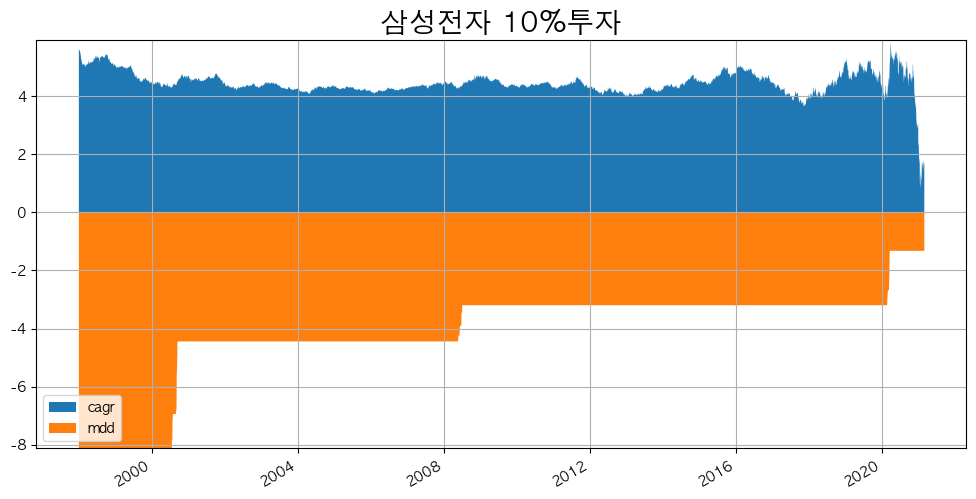

In [46]:
투자진입시점별CAGRMDD(t1, "삼성전자 10%투자")

                           Strategy
-------------------------  ----------
Start Period               1997-12-27
End Period                 2022-02-22
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          274.69%
CAGR﹪                     5.62%

Sharpe                     1.37
Smart Sharpe               1.26
Sortino                    2.18
Smart Sortino              2.01
Sortino/√2                 1.54
Smart Sortino/√2           1.42
Omega                      1.29

Max Drawdown               -8.12%
Longest DD Days            488
Volatility (ann.)          4.11%
Calmar                     0.69
Skew                       0.54
Kurtosis                   5.7

Expected Daily %           0.02%
Expected Monthly %         0.45%
Expected Yearly %          5.21%
Kelly Criterion            12.0%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.4%
Expected Shortfall (cVaR)  -0.4%

Gain/Pain Ratio            0.29
Gain/Pain (1M)             2.26



None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2000-07-14,2000-10-18,2001-11-14,488,-8.118,-7.743
2,1998-03-02,1998-09-22,1998-11-14,257,-7.219,-7.090
3,2008-05-16,2008-10-24,2009-03-27,315,-4.425,-3.850
4,2004-04-26,2004-07-15,2005-02-07,287,-3.632,-3.478
5,2000-03-30,2000-04-27,2000-06-14,76,-3.473,-3.372


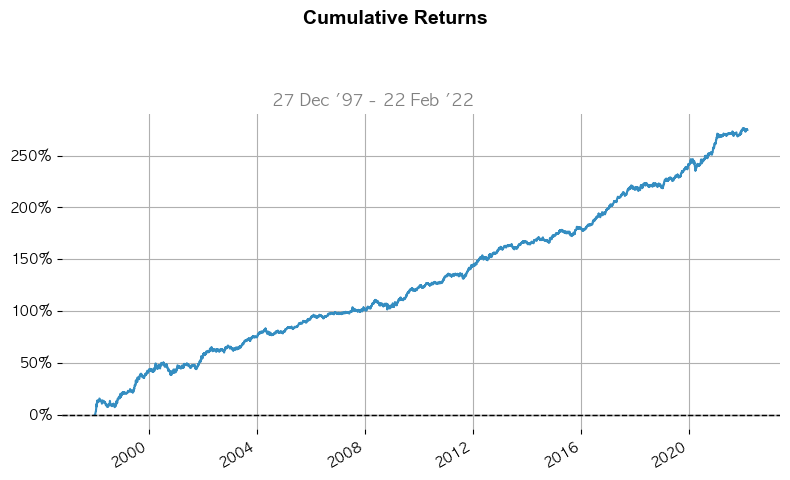

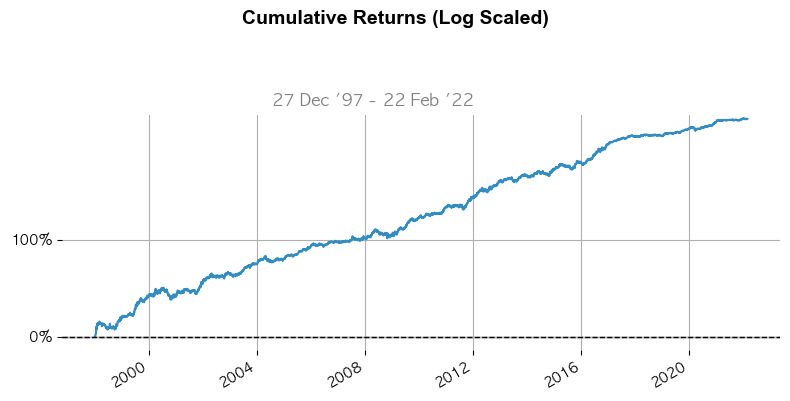

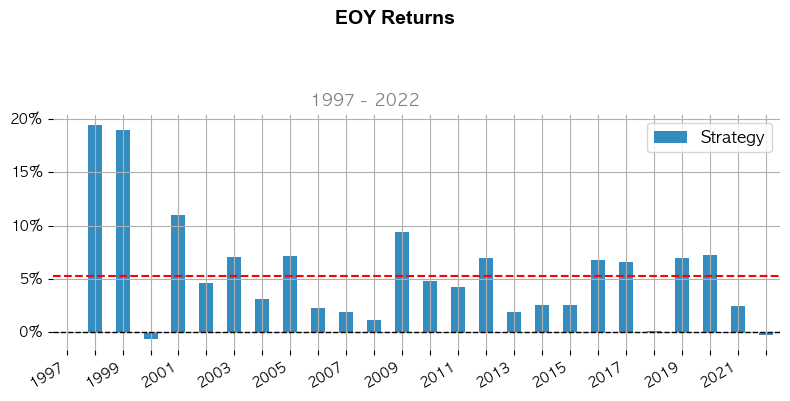

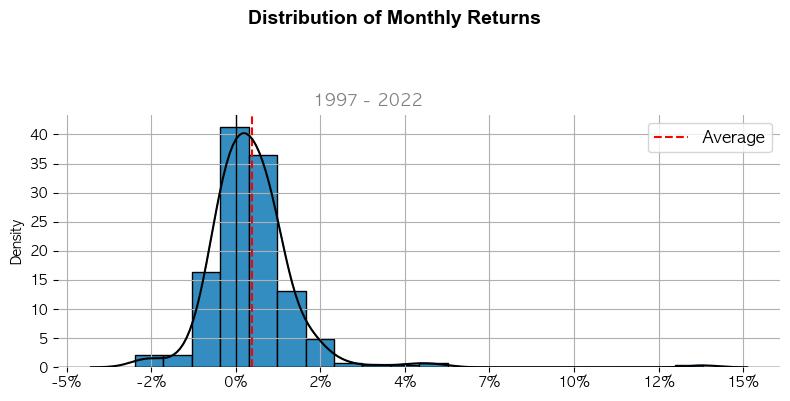

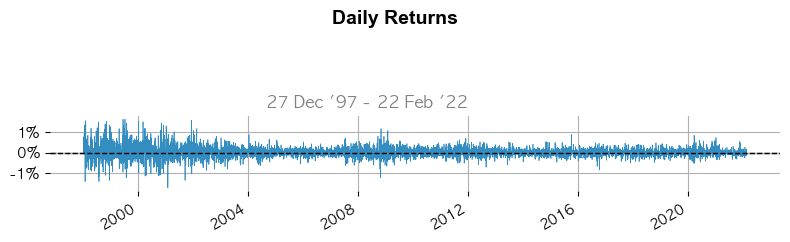

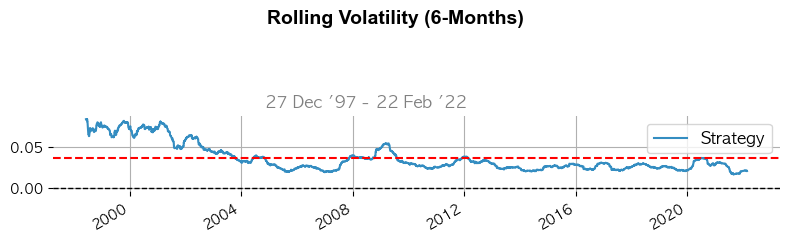

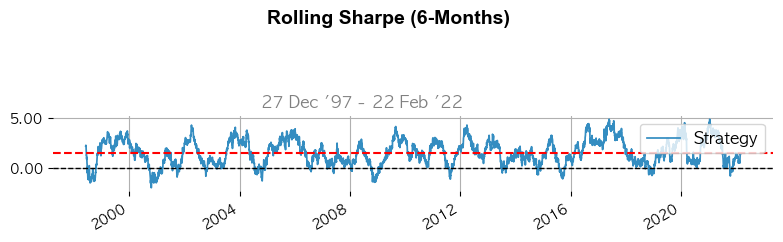

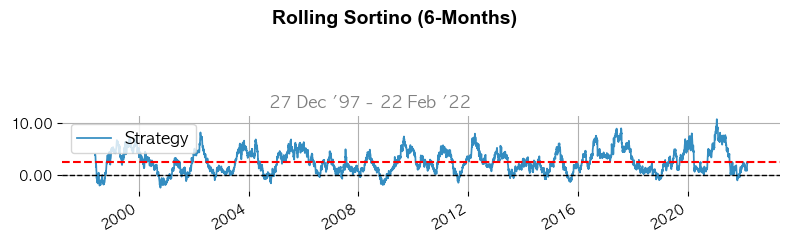

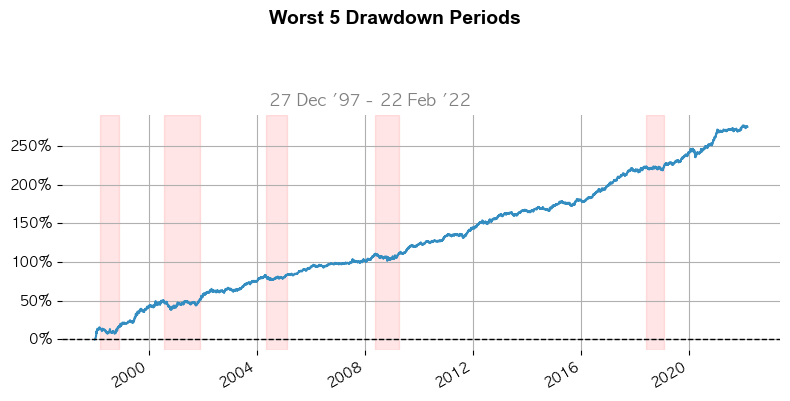

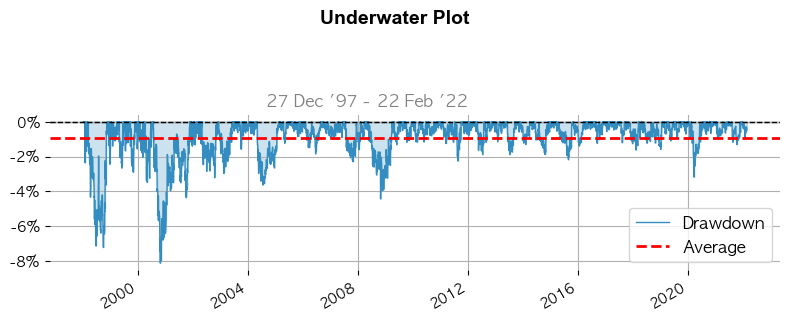

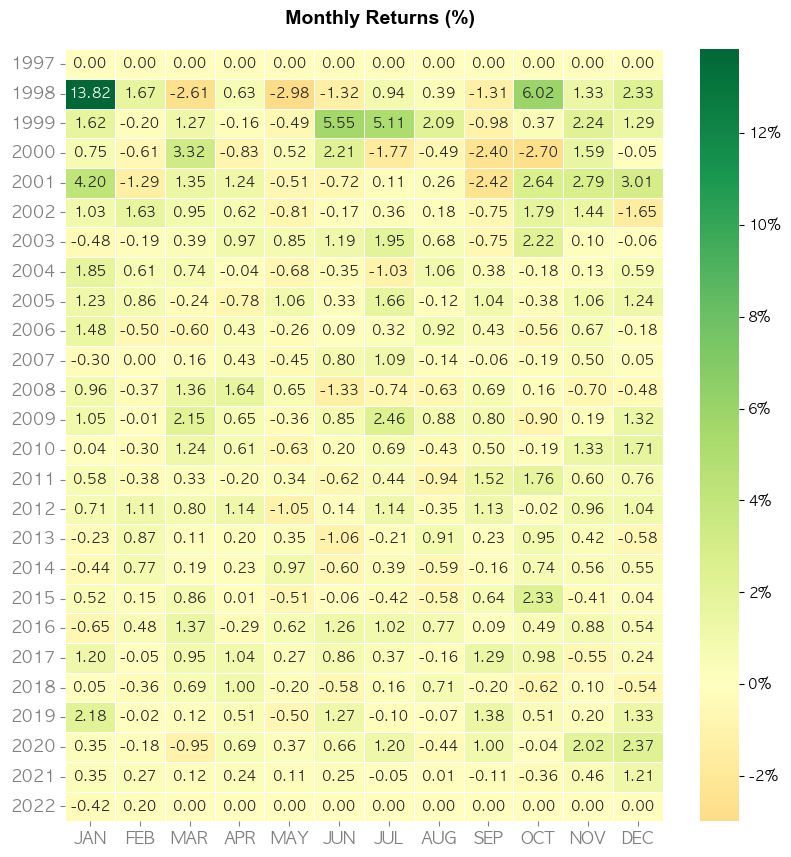

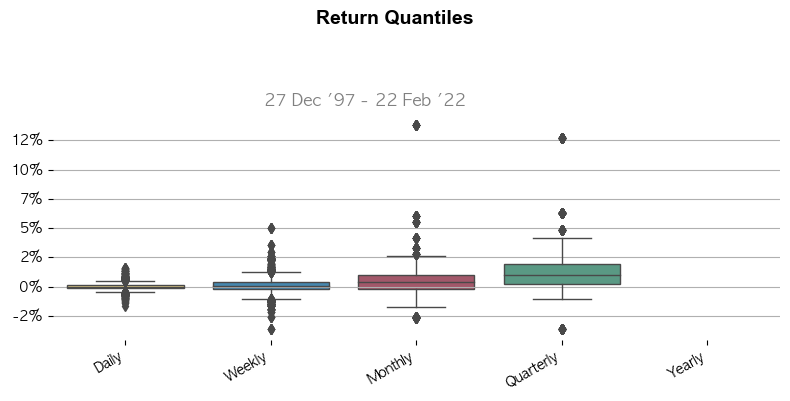

In [50]:
qs.reports.full(r_all.prices.loc[:,'t1'].pct_change().dropna())